In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
from pyspark.sql.functions import to_date
from pyspark.sql.functions import sum


spark = SparkSession.builder.appName("AmazonSales").getOrCreate()


In [11]:
df = spark.read.csv("hdfs://namenode:8020/user/hadoop/amazon_sales_data_2025.csv", header = True, inferSchema=True)

In [12]:
df.show()

+--------+--------+---------------+---------------+-----+--------+-----------+-------------+-----------------+--------------+---------+
|Order ID|    Date|        Product|       Category|Price|Quantity|Total Sales|Customer Name|Customer Location|Payment Method|   Status|
+--------+--------+---------------+---------------+-----+--------+-----------+-------------+-----------------+--------------+---------+
| ORD0001|14-03-25|  Running Shoes|       Footwear|   60|       3|        180|   Emma Clark|         New York|    Debit Card|Cancelled|
| ORD0002|20-03-25|     Headphones|    Electronics|  100|       4|        400|Emily Johnson|    San Francisco|    Debit Card|  Pending|
| ORD0003|15-02-25|  Running Shoes|       Footwear|   60|       2|        120|     John Doe|           Denver|    Amazon Pay|Cancelled|
| ORD0004|19-02-25|  Running Shoes|       Footwear|   60|       3|        180|Olivia Wilson|           Dallas|   Credit Card|  Pending|
| ORD0005|10-03-25|     Smartwatch|    Electroni

In [6]:
#Posible analisis "que cuidad es donde se manda mas productos?", "Metodo de pago preferido",
#"Que temporada es donde mas compran?", "Que productos son mas vendidos?","Tendencia de ventas"

In [16]:
df = df.withColumn("Date", to_date(col("Date"), "dd-MM-yy"))


In [17]:
#Agrupar por fecha y sumar ventas totales
daily_sales = df.groupBy("Date").agg(sum("Total Sales").alias("Total_Sales")).orderBy("Date")
daily_sales_pd = daily_sales.toPandas()


In [18]:
#Grafica

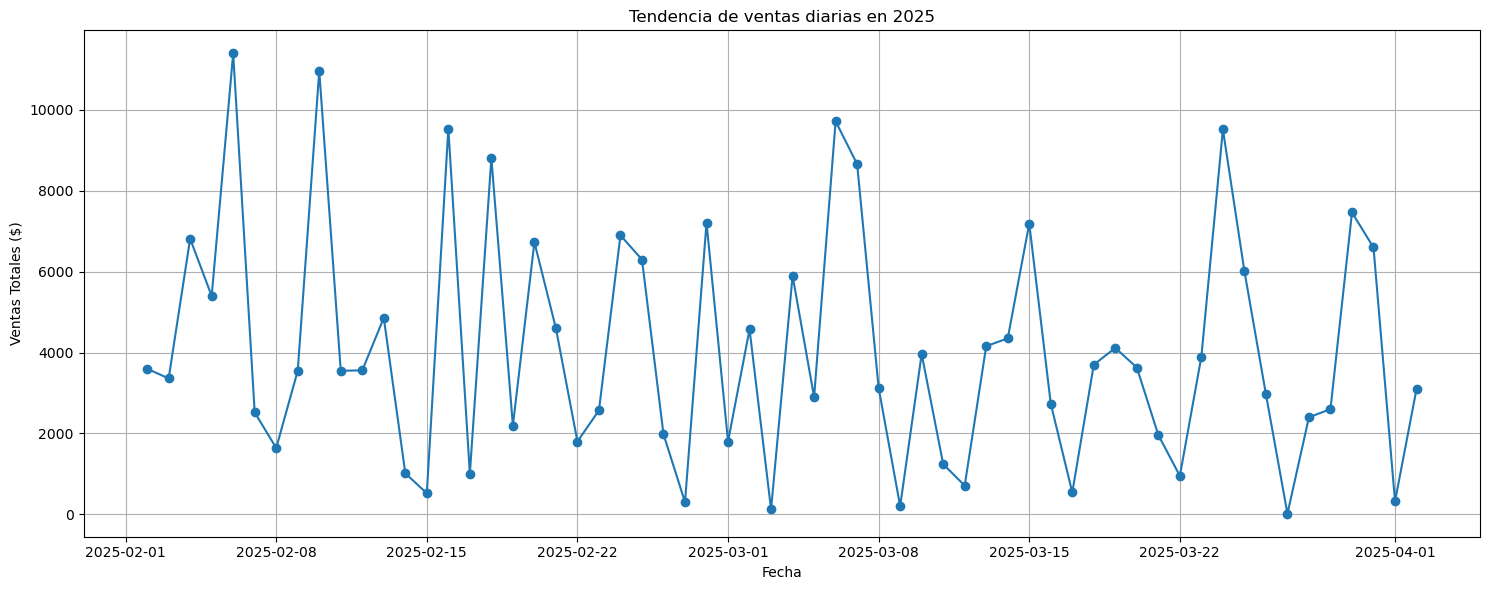

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_pd["Date"], daily_sales_pd["Total_Sales"], marker='o')
plt.title("Tendencia de ventas diarias en 2025")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#Las ventas diarias de febrero y marzo de 2025 han subido y bajado mucho, algunos días superan los $10,000, seguidos de caídas, 
#esto podría ser por promociones o fechas específicas en esos dias. Para tomar decisiones, sería útil analizar los días pico y 
#agrupar los datos por semana o mes para detectar tendencias más claras. Para esto necesitaremos incluso datos desde fechas anteriores